In [28]:
import numpy as np
import pandas as pd
from os.path import join
from scipy.spatial.transform import Rotation as R 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [29]:
!ls ../dataset/trunk

10_05_2019_21_28_11	    left1.png	   raw_right1.png  Untitled.ipynb
10_05_2019_21_28_11.tar.gz  raw_left1.png  raw_right2.png
11_05_2019_14_09_58	    raw_left2.png  raw_right3.png
11_05_2019_14_09_58.tar.gz  raw_left3.png  real.jpg


In [30]:
df = pd.read_csv("../dataset/trunk/11_05_2019_14_09_58/dataset/processed/result.csv")
df

id  center_in_cam_0  center_in_cam_1  center_in_cam_2  center_in_cam_3  \
0      0       195.233000       116.271000       641.614000                1   
1      1       195.347000      -128.156000       531.453000                1   
2      2       135.658000       -98.789300       514.900000                1   
3      3       -53.210000      -106.252000       436.086000                1   
4      4        78.908700      -172.729000       582.590000                1   
5      5       137.095000        -4.107840       605.813000                1   
6      6        63.859900        48.038700       375.073000                1   
7      7       -47.685100      -144.312000       608.269000                1   
8      8       119.211000       -73.420300       702.867000                1   
9      9       143.832000        12.191500       390.409000                1   
10    10       119.397000      -115.889000       677.079000                1   
11    11       164.360000       -54.377000       501.752000                1   
12    12         0.045559         0.013276        -0.998873                0   
13    13       154.598000        36.803900       669.471000                1   
14    14        29.225800        16.653700       375.839000                1   
15    15        -2.027680        34.554100       306.061000                1   
16    16       -24.716100      -180.764000       590.889000                1   
17    17       207.995000        72.492300       389.482000                1   
18    18       164.360000       -54.377000       501.752000                1   
19    19       -88.338800       113.923000       605.252000                1   
20    20       181.276000       127.671000       639.892000                1   
21    21       224.067000      -182.097000       598.432000                1   
22    22       145.324000       -44.169200       651.242000                1   
23    23       -88.338800       113.923000       605.252000                1   
24    24         0.030869         0.010598        -0.999467                0   
25    25       -82.778800      -112.682000       434.367000                1   
26    26       161.171000       -68.229600       524.611000                1   
27    27       217.653000       -76.157700       537.597000                1   
28    28        16.326000       124.650000       633.750000                1   
29    29         8.531920        40.683000       469.543000                1   
..   ...              ...              ...              ...              ...   
170  170        31.552600        10.641700       297.645000                1   
171  171       154.407000        29.845800       408.829000                1   
172  172        40.956300        36.985000       488.539000                1   
173  173        79.642600        43.422700       702.508000                1   
174  174       155.394000        33.806900       504.166000                1   
175  175         0.041493         0.023659        -0.998859                0   
176  176       115.622000      -188.586000       617.604000                1   
177  177        -8.531060        55.827100       681.394000                1   
178  178       161.171000       -68.229600       524.611000                1   
179  179       180.327000       132.016000       701.653000                1   
180  180        94.153800      -134.444000       546.296000                1   
181  181       -54.099500        -7.193830       453.296000                1   
182  182         0.042890         0.006477        -0.999059                0   
183  183       -53.210000      -106.252000       436.086000                1   
184  184         0.019828         0.008738        -0.999765                0   
185  185       119.397000      -115.889000       677.079000                1   
186  186       135.658000       -98.789300       514.900000                1   
187  187       -53.210000      -106.252000       436.086000                1   
188  1

In [49]:


class DataAnalysor:
    def __init__(self, dir_name):
        self.dir_name = join("../dataset/trunk", dir_name)
    
    def readGroundTruth(self):
        gt_path = join(self.dir_name, "dataset/ground_truth/result.csv")
        self.df_gt_in_base = pd.read_csv(gt_path,header=None,names=["x","y","z"])
        
    def readProcessedData(self):
        hough_path = join(self.dir_name, "dataset/processed/result.csv")
        self.df_hough = pd.read_csv(hough_path)
        
        #combile_path = join(self.dir_name, "dataset/processed/result_method_combile.csv")
        #self.df_combile = pd.read_csv(combile_path)
        
        #morphology_path = join(self.dir_name, "dataset/processed/result_method_morphology.csv")
        #self.df_morphology = pd.read_csv(morphology_path)
        
        #hough_particle_filter_path = join(self.dir_name, "dataset/processed/result_hough_particle_filter.csv")
        #self.df_hough_particle_filter = pd.read_csv(hough_particle_filter_path)

    def computeErrorInBase(self, df_processed_result):
        df = df_processed_result.copy()
        
        center_avg = np.zeros(3)
        plan_avg = np.zeros(4)
        q_avg = np.zeros(4)
        success_num = 0
        for index, row in df_processed_result.iterrows():
            if(row["success"]):
                success_num += 1
                center_avg[0] += row["center_in_base_0"]
                center_avg[1] += row["center_in_base_1"]
                center_avg[2] += row["center_in_base_2"]
                plan_avg[0] += row["plane_in_base_0"]
                plan_avg[1] += row["plane_in_base_1"]
                plan_avg[2] += row["plane_in_base_2"]
                plan_avg[3] += row["plane_in_base_3"]
                q_avg[0] += row["q_x"]
                q_avg[1] += row["q_y"]
                q_avg[2] += row["q_z"]
                q_avg[3] += row["q_w"]
                
        plan_avg /= success_num
        center_avg /= success_num
        q_avg /= success_num
        q_avg_norm = np.sqrt(q_avg[0] ** 2 + q_avg[1] ** 2 + q_avg[2] ** 2 + q_avg[3] ** 2)
        q_avg = q_avg / q_avg_norm
        
        
        r_baseline = R.from_quat(q_avg).inv()
        
        
        df["center_error_x"] = 0.0
        df["center_error_y"] = 0.0
        df["center_error_z"] = 0.0
        df["a_error"] = 0.0
        df["b_error"] = 0.0
        df["c_error"] = 0.0
        #df["center_avg"] = [center_avg]
        #df["plan_avg"] = [plan_avg]
        df["not_mismatch"] = True
        
        for index, row in df_processed_result.iterrows():
            curr_center = np.array([row["center_in_base_0"],row["center_in_base_1"],row["center_in_base_2"]])
            curr_plane =  np.array([row["plane_in_base_0"],row["plane_in_base_1"],row["plane_in_base_2"], row["plane_in_base_3"]])
            center_error = (curr_center - center_avg)
            df.loc[index, "center_error_x"] = center_error[0]
            df.loc[index, "center_error_y"] = center_error[1]
            df.loc[index, "center_error_z"] = center_error[2]
            df.loc[index, "plan_angle_error"] = np.arccos(np.abs(np.dot(curr_plane[0:3], plan_avg[0:3])) /(np.linalg.norm(curr_plane[0:3]) * np.linalg.norm(plan_avg[0:3])))
            
            abc_error = (r_baseline * R.from_quat([row["q_x"], row["q_y"], row["q_z"], row["q_w"]])).as_euler('XYZ', degrees=False)
            df.loc[index, "a_error"] = abc_error[0]
            df.loc[index, "b_error"] = abc_error[1]
            if( abc_error[2] > 0):
                df.loc[index, "c_error"] = abc_error[2]
            else:
                df.loc[index, "c_error"] = abc_error[2] + np.pi/2 # normalize to 0~90 deg
            
            
            xyz_threshold = 500000
            angle_threshold = 20000
            print(center_error)
            if center_error.min() > xyz_threshold or df.loc[index, "plan_angle_error"]>angle_threshold or not df.loc[index, "success"]:
                df.loc[index, "not_mismatch"] = False
      
        return df
        
        
        
        


In [50]:
def getRotationMatrix(abc):
    r = R.from_euler('xyz',abc, degrees=False)
    return r.as_dcm()
def angle_distance(abc_1, abc_2):
    vec1=[0,0,1]
    vec2=[0,0,1]
    vec1 = np.dot(getRotationMatrix(abc_1), vec1)
    vec2 = np.dot(getRotationMatrix(abc_2), vec2)
    print(vec1, vec2)
    cos_angle = np.dot(vec1,vec2)/(np.linalg.norm(vec1)*np.linalg.norm(vec2))
    if abs(cos_angle - 1.0) < 1e-5:
        return 0
    angle=np.arccos(cos_angle)
    return angle

In [51]:
def euler_angle_distance_method1(abc_1, abc_2): 
    # see http://www.cs.cmu.edu/~cga/dynopt/readings/Rmetric.pdf 
    def d(angle0, angle1):
        return min(abs(angle0-angle1), 2*np.pi - abs(angle0-angle1))
    distance = np.sqrt(d(abc_1[0], abc_2[0])**2 + d(abc_1[1], abc_2[1])**2 + d(abc_1[2], abc_2[2])**2)
    return distance
    
def euler_angle_distance(abc_1, abc_2): 
    # roll is too close to pi/2, lets add a rotation -pi/2 to them
    r1 = R.from_euler('XYZ', abc_1, degrees=False)
    r2 = R.from_euler('XYZ', abc_2, degrees=False)
    
    # -pi
    pitch_compensate = R.from_euler('Z', -np.pi/2.0, degrees=False)
    yaw_compensate = R.from_euler('Y', -np.pi/2.0, degrees=False)
    
    r1 = pitch_compensate*yaw_compensate* r1 
    r2 = pitch_compensate*yaw_compensate* r2

    #r1 = r2.inv() * r1 
    xyz_error = r1.as_euler('XYZ', degrees=False) - r2.as_euler('XYZ', degrees=False)
    #print(r1.as_euler('XYZ', degrees=False), r2.as_euler('XYZ', degrees=False))
    return xyz_error
gt_abc_in_base = [1.598960, 1.633200, -0.010637]
abc = [2.17049, 1.6243299999999998, -0.582609]
r1 = R.from_euler('XYZ', gt_abc_in_base, degrees=False)
print(r1.as_quat())

r2 = R.from_euler('XYZ', abc, degrees=False)
print(r2.as_quat())
pitch_compensate = R.from_euler('Z', -np.pi/2.0, degrees=False)
yaw_compensate = R.from_euler('Y', -np.pi/2.0, degrees=False)
    
r1 = pitch_compensate*yaw_compensate* r1 
r2 = pitch_compensate*yaw_compensate* r2

print(r1.as_euler('XYZ', degrees=False))
print(r2.as_euler('XYZ', degrees=False))

[0.48821887 0.51065082 0.52001497 0.48006511]
[0.4855034  0.49918607 0.52264109 0.49188007]
[-0.00175957  0.06237889  0.01758157]
[-0.03023353  0.04418578  0.01775278]


In [52]:
data_analysor = DataAnalysor("11_05_2019_14_09_58")
#data_analysor.readGroundTruth()
data_analysor.readProcessedData()


In [53]:
def visualizeCorners(df):
    """
    visualize corners, in order to make sure the abc are correct
    """
    # Set up the plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    
    corner = np.array([[50,50,0], [-50,50,0],[-50,-50,0],[50,-50,0]])
    color = ["r","g","b","y"]
    print(corner.shape[0])
    for i in range(corner.shape[0]):
        rotated_corner = []
        for index, row in df.iterrows():
            angle_a = row["xyz_abc_in_base_a"]
            angle_b = row["xyz_abc_in_base_b"]
            angle_c = row["xyz_abc_in_base_c"]
            print("angle_c", angle_c)
            r = R.from_euler("xyz", [angle_a, angle_b, angle_c], degrees=False)
            #r = R.from_euler("xyz", [0, 0, 0], degrees=False)
            
            new_corner = np.dot(r.as_dcm(), corner[i,:])
            print(new_corner)
            if(index>10):
                break
            rotated_corner.append(new_corner)
        rotated_corner = np.array(rotated_corner)
        print(rotated_corner)
        scatter=ax.scatter(rotated_corner[:,0], rotated_corner[:,1], rotated_corner[:,2], c=color[i])
    fig.show()
    

In [54]:
#visualizeCorners(data_analysor.df_hough)

In [55]:

def visualizeErrorHeatMapInBase(success_mask, x, y, z, error, title, filter_fault=False, treshold=100):
    filterd_index = []
    for i in range(len(success_mask)):
        if(success_mask[i] == 1):
            if(not filter_fault):
                filterd_index.append(i)
            elif (filter_fault and error[i] < treshold):
                filterd_index.append(i)
            
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title(title)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    scatter=ax.scatter(x[filterd_index], y[filterd_index], z[filterd_index], c=error[filterd_index])
    plt.colorbar(scatter, ax=ax)
    fig.show()
def visualizeErrorDistribution(success_mask, error, error_name, filter_fault=False, treshold=30):
    filterd_index = []
    for i in range(len(success_mask)):
        if(success_mask[i] == 1):
            if(not filter_fault):
                filterd_index.append(i)
            elif (filter_fault and error[i] < treshold):
                filterd_index.append(i)
                
    # Set up the plot
    fig = plt.figure()
    
    ax = fig.add_subplot(311)
    
    # Draw the plot
    ax.hist(error[filterd_index], bins = 20,
             color = 'blue', edgecolor = 'black')
    
    # Title and labels
    ax.set_title(error_name + " distribution")
    ax.set_xlabel(error_name)
    ax.set_ylabel("number")
def visualizeSuccessHeatMapInBase(success_mask, x, y, z, error, title, filter_fault=False, treshold=30):
    filterd_index = []
    for i in range(len(success_mask)):
        if(not filter_fault):
            filterd_index.append(i)
        elif (filter_fault and error[i] < treshold):
            filterd_index.append(i)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title(title)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    scatter=ax.scatter(x[filterd_index], y[filterd_index], z[filterd_index], c=success_mask[filterd_index])
    plt.colorbar(scatter, ax=ax)
    fig.show()
def visualize(df, method):
    %matplotlib notebook
    visualizeErrorHeatMapInBase(df["not_mismatch"], df["center_in_cam_0"], df["center_in_cam_1"], 
                                df["center_in_cam_2"], df["center_error_x"], method + ": error of x")
    visualizeErrorDistribution(df["not_mismatch"], df["center_error_x"], "error of x (mm)")

    visualizeErrorHeatMapInBase(df["not_mismatch"], df["center_in_cam_0"], df["center_in_cam_1"], 
                                df["center_in_cam_2"], df["center_error_y"], method + ": error of y", True)
    visualizeErrorDistribution(df["not_mismatch"], df["center_error_y"], "error of y (mm)")
    visualizeErrorHeatMapInBase(df["not_mismatch"], df["center_in_cam_0"], df["center_in_cam_1"], 
                                df["center_in_cam_2"], df["center_error_z"], method + ": error of z", True)
    visualizeErrorDistribution(df["not_mismatch"], df["center_error_z"], "error of z (mm)")

    
    
    visualizeErrorHeatMapInBase(df["not_mismatch"], df["center_in_cam_0"], df["center_in_cam_1"], 
                                df["center_in_cam_2"], df["a_error"]/ np.pi * 180, method + ": error of a (deg)")
    visualizeErrorDistribution(df["not_mismatch"], df["a_error"]/ np.pi * 180, "error of a (deg)")

    visualizeErrorHeatMapInBase(df["not_mismatch"], df["center_in_cam_0"], df["center_in_cam_1"], 
                                df["center_in_cam_2"], df["b_error"]/ np.pi * 180, method + ": error of b (deg)", True)
    visualizeErrorDistribution(df["not_mismatch"], df["b_error"]/ np.pi * 180, "error of b (deg)")
    visualizeErrorHeatMapInBase(df["not_mismatch"], df["center_in_cam_0"], df["center_in_cam_1"], 
                                df["center_in_cam_2"], df["c_error"]/ np.pi * 180, method + ": error of c", True)
    visualizeErrorDistribution(df["not_mismatch"], df["c_error"]/ np.pi * 180, "error of c (deg)")



    print("success ratio: ", np.sum(df["success"])/df["success"].shape[0])
    #print("mismatch ratio: ",1.0- np.sum(df["not_mismatch"])/df["not_mismatch"].shape[0])
    
    visualizeErrorHeatMapInBase(df["not_mismatch"], df["center_in_cam_0"], df["center_in_cam_1"], 
                                df["center_in_cam_2"], df["plan_angle_error"]/ np.pi * 180, method + ": error of plan(deg)")

    visualizeErrorHeatMapInBase(df["not_mismatch"], df["center_in_cam_0"], df["center_in_cam_1"], 
                                df["center_in_cam_2"], df["plan_angle_error"]/ np.pi * 180, method+": error of plan(deg)", True)

    visualizeErrorDistribution(df["not_mismatch"], df["plan_angle_error"] / np.pi * 180, method+": error of plan (deg)")
    visualizeErrorDistribution(df["not_mismatch"], df["plan_angle_error"] / np.pi * 180, method+": zoomed error of plan (deg)", True)

        

In [56]:
#df_hough["not_mismatch"]
    
    




0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12     False
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24     False
25      True
26      True
27      True
28      True
29      True
       ...  
170     True
171     True
172     True
173     True
174     True
175    False
176     True
177     True
178     True
179     True
180     True
181     True
182    False
183     True
184    False
185     True
186     True
187     True
188     True
189     True
190     True
191     True
192     True
193     True
194     True
195     True
196    False
197     True
198     True
199     True
Name: not_mismatch, Length: 200, dtype: bool

[ 1.7195858  -0.36938462  0.9317574 ]
[0.7395858  0.05661538 0.1417574 ]
[0.0595858  0.20461538 0.3877574 ]
[ 1.5695858  -0.31838462 -0.1152426 ]
[-1.5404142  -0.24438462  0.4177574 ]
[-0.0404142  -0.11038462  0.0207574 ]
[ 0.7095858   0.10961538 -0.0452426 ]
[-4.8404142  -0.95938462  0.9667574 ]
[-2.5004142   0.17661538  0.2067574 ]
[ 1.4795858  -0.04138462  0.1447574 ]
[ 0.0795858  -0.35738462  0.1887574 ]
[0.3795858  0.10161538 0.0797574 ]
[1376.4851445  -330.78610812 -141.0401156 ]
[-1.5904142   0.32461538  0.2477574 ]
[ 1.2895858  -0.13138462 -0.2562426 ]
[ 1.0695858  -0.35938462 -0.4122426 ]
[ 0.0495858  -0.58938462  0.1237574 ]
[-3.3304142   1.93161538 -1.1842426 ]
[0.3795858  0.10161538 0.0797574 ]
[-2.1204142  -0.08638462 -0.4222426 ]
[-0.3304142   0.18761538  0.1577574 ]
[ 1.4095858  -0.39238462  0.3747574 ]
[ 0.1995858  -0.08038462  0.3467574 ]
[-2.1204142  -0.08638462 -0.4222426 ]
[1376.4704543  -330.78878662 -141.0407096 ]
[ 1.3295858  -0.33438462  0.3077574 ]
[ 0.3295858 

<IPython.core.display.Javascript object>


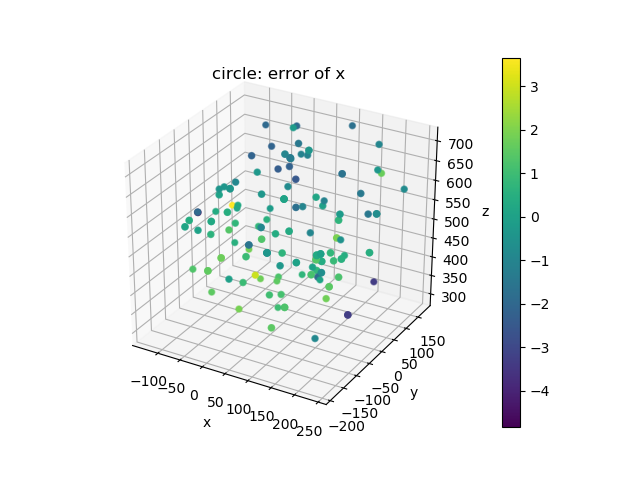

<IPython.core.display.Javascript object>


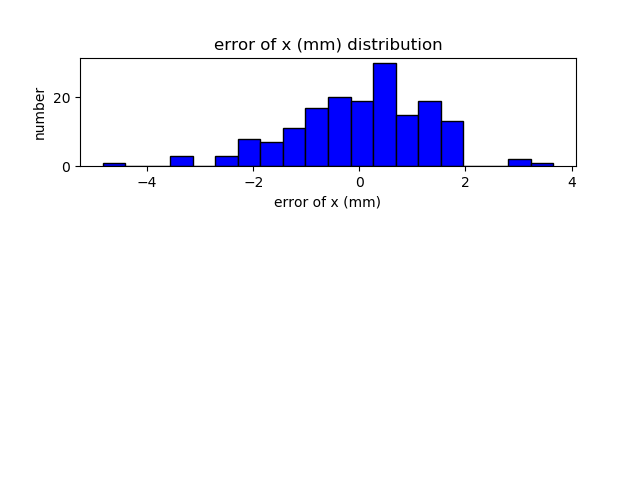

<IPython.core.display.Javascript object>


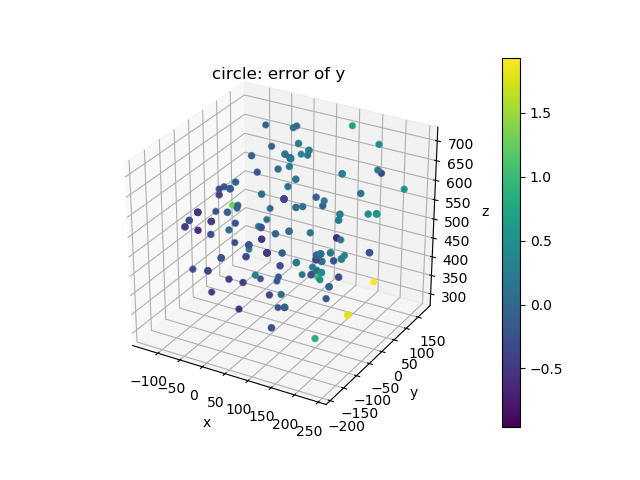

<IPython.core.display.Javascript object>


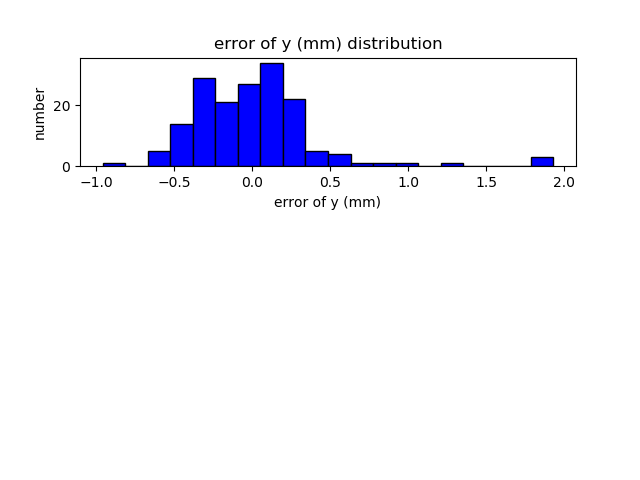

<IPython.core.display.Javascript object>


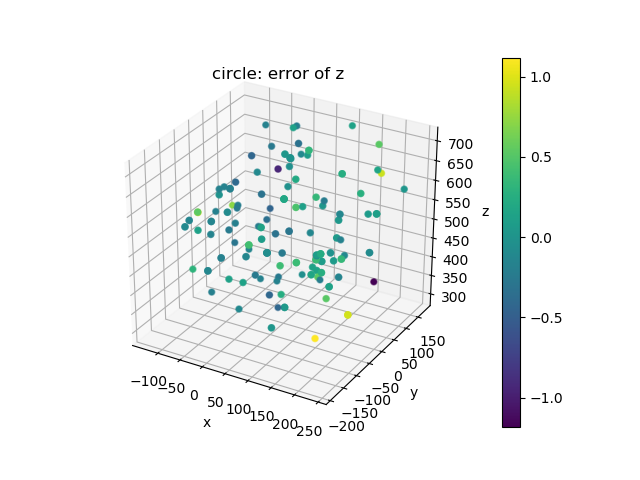

<IPython.core.display.Javascript object>


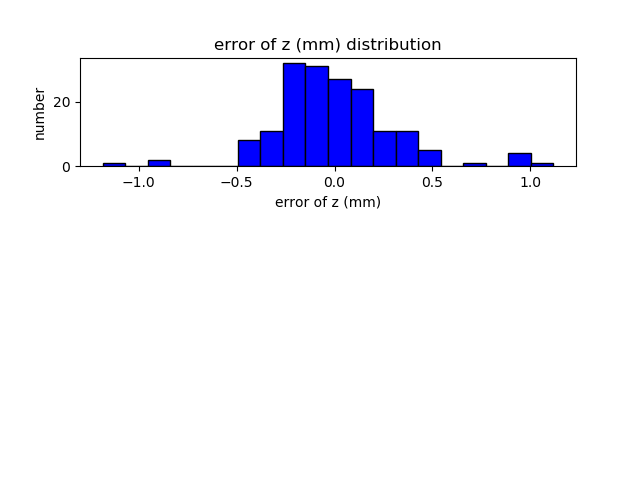

<IPython.core.display.Javascript object>


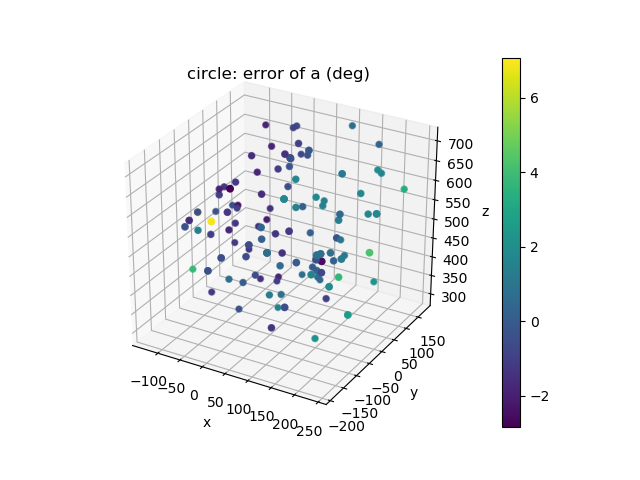

<IPython.core.display.Javascript object>


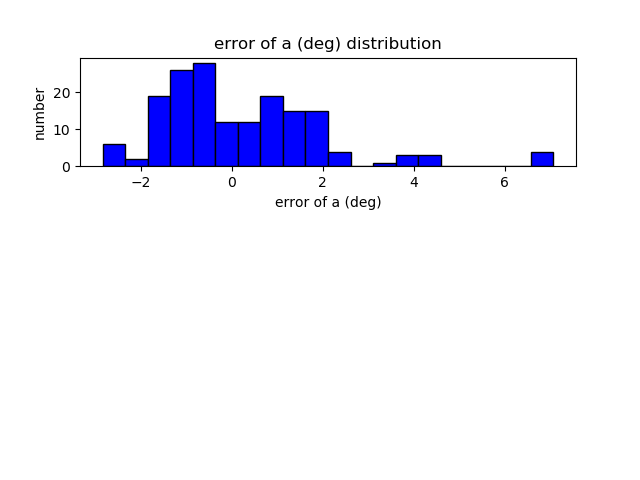

<IPython.core.display.Javascript object>


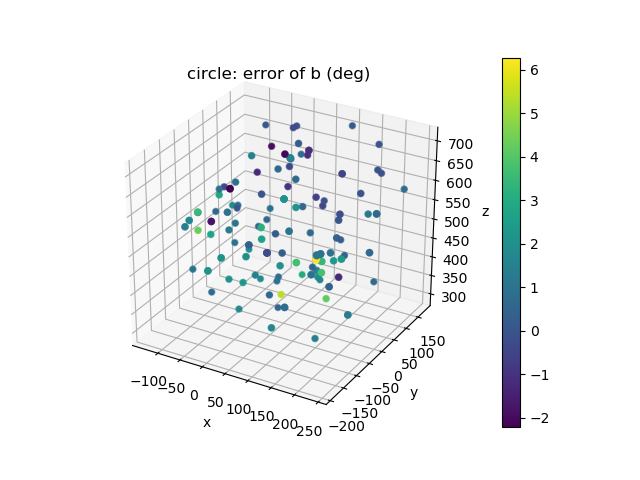

<IPython.core.display.Javascript object>


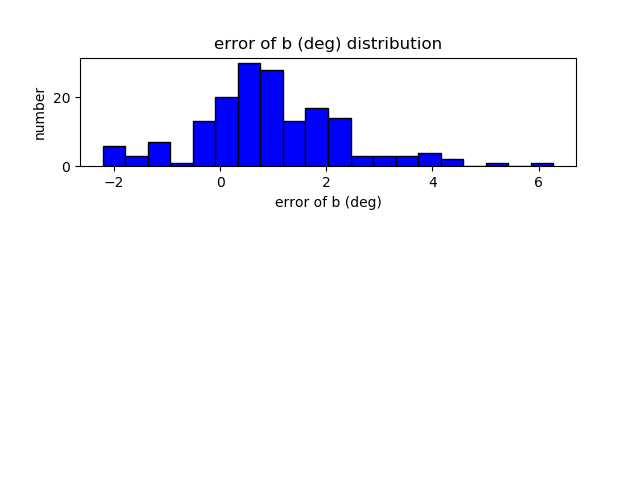

<IPython.core.display.Javascript object>


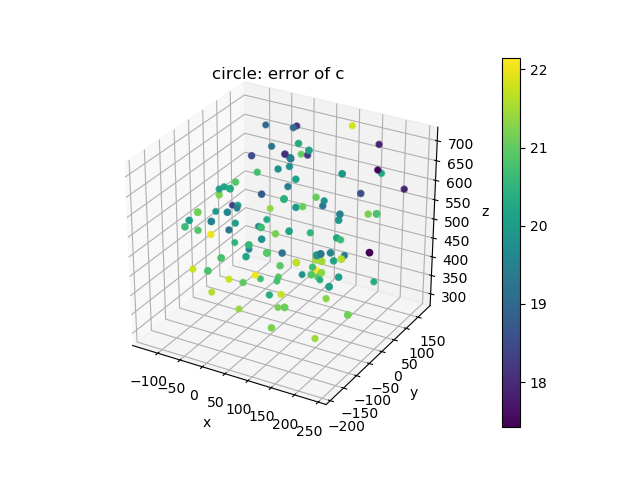

<IPython.core.display.Javascript object>


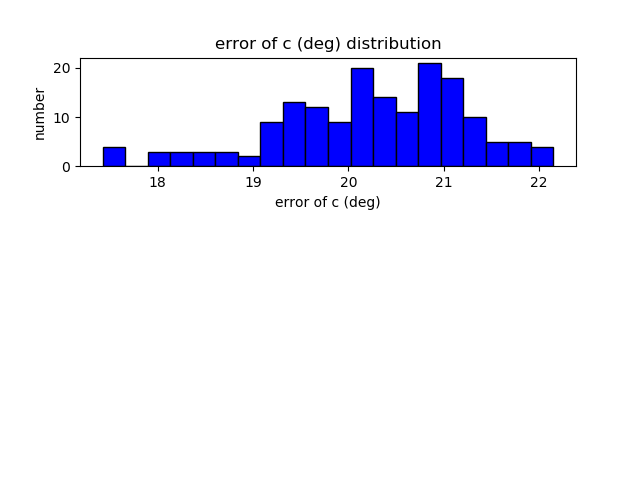

success ratio:  0.845


<IPython.core.display.Javascript object>


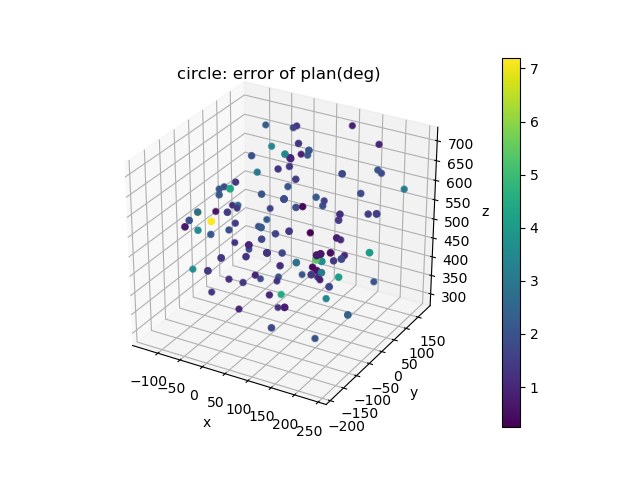

<IPython.core.display.Javascript object>


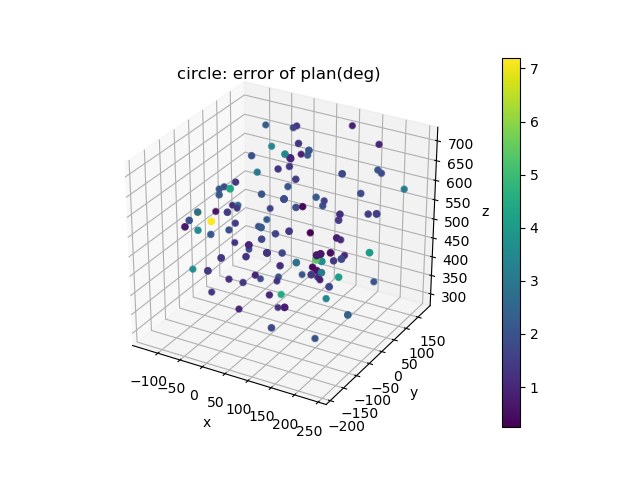

<IPython.core.display.Javascript object>


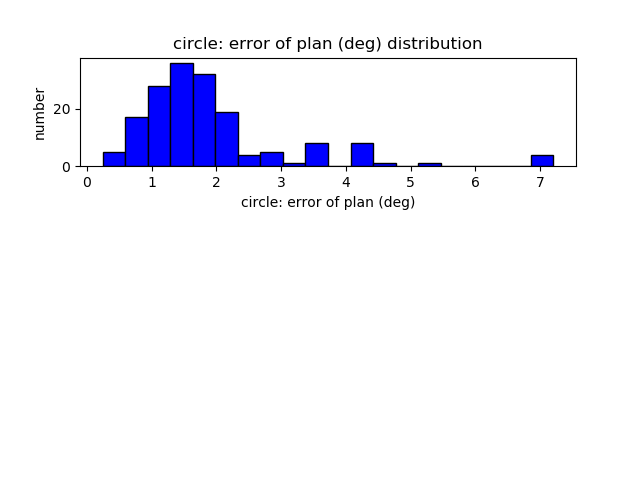

<IPython.core.display.Javascript object>


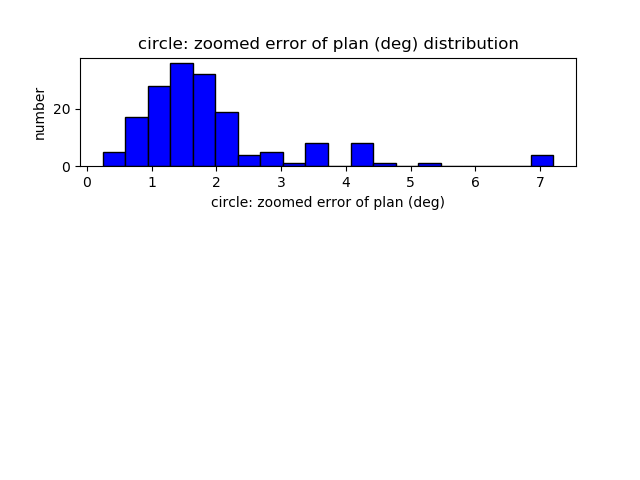

In [57]:
df_hough = data_analysor.computeErrorInBase(data_analysor.df_hough)
visualize(df_hough, "circle")



In [43]:
mask = df_hough["plan_angle_error"] > 5 / 180 * np.pi
df_hough[mask][["center_in_base_0", "center_in_base_1", "center_in_base_2","center_in_base_3"]]

center_in_base_0  center_in_base_1  center_in_base_2  center_in_base_3
7         -1381.28000        329.840000         141.00800                 1
21        -1375.03000        330.407000         140.41600                 1
80        -1376.15000        330.339000         139.90300                 1
93        -1376.15000        330.339000         139.90300                 1
141           0.06353          0.000695          -0.99798                 0
155       -1376.15000        330.339000         139.90300                 1

     id  center_in_cam_0  center_in_cam_1  center_in_cam_2  center_in_cam_3  \
0     1        88.610100       114.110000       496.231000                1   
1     6        84.739500       -14.512400       377.804000                1   
2    19         0.042951         0.007998        -0.999045                0   
3    32       -75.155300      -142.360000       496.293000                1   
4    42        29.253300        16.628400       375.568000                1   
5    45        -4.117220        36.050900       458.200000                1   
6    46        13.759500      -104.433000       357.003000                1   
7    47         0.044989         0.017915        -0.998827                0   
8    50         0.038170         0.044126        -0.998297                0   
9    51        -4.035890         4.507240       366.616000                1   
10   55         0.053087         0.011689        -0.998521                0   
11   57        88.610100       114.110000       496.

<IPython.core.display.Javascript object>


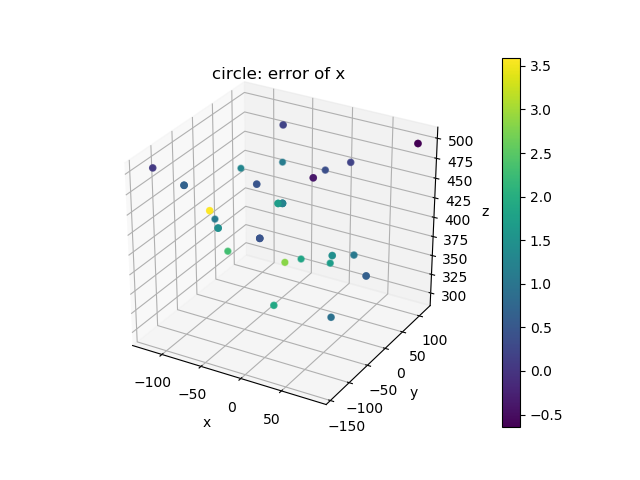

<IPython.core.display.Javascript object>


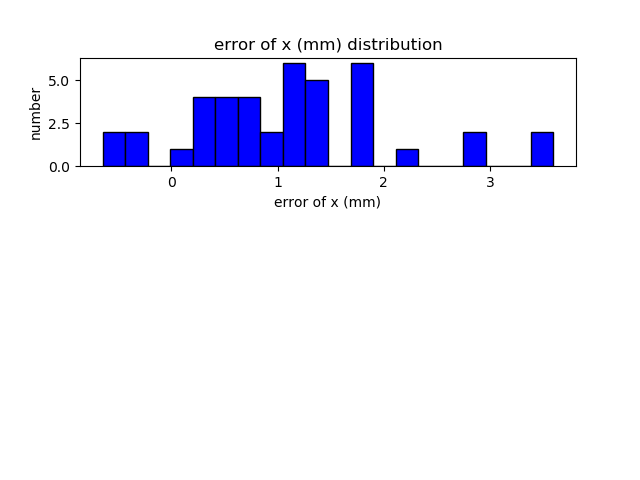

<IPython.core.display.Javascript object>


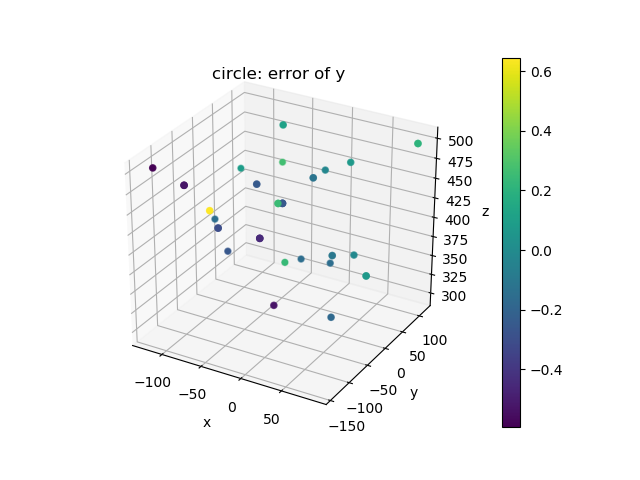

<IPython.core.display.Javascript object>


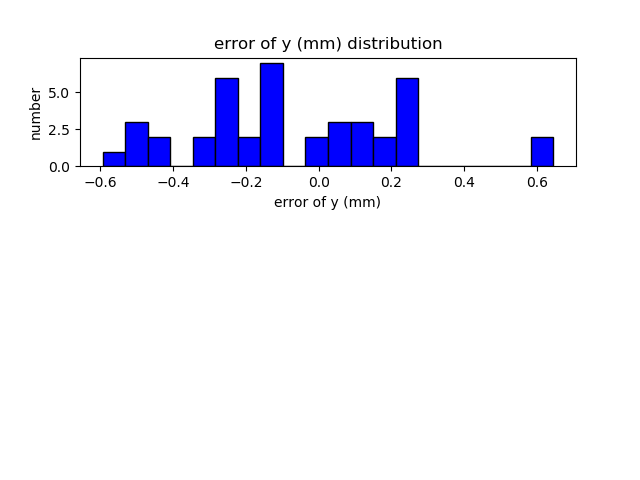

<IPython.core.display.Javascript object>


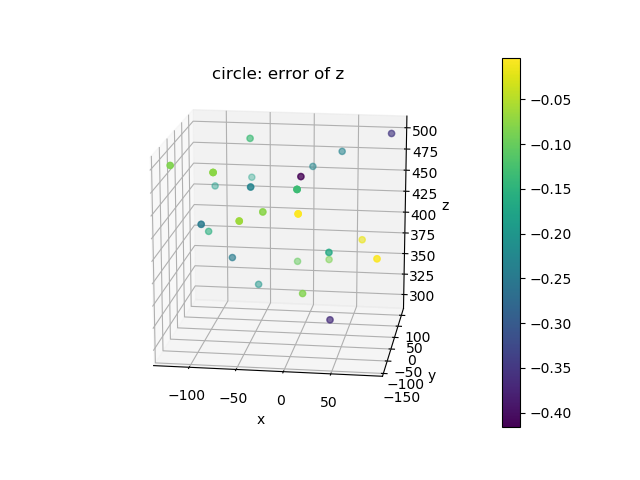

<IPython.core.display.Javascript object>


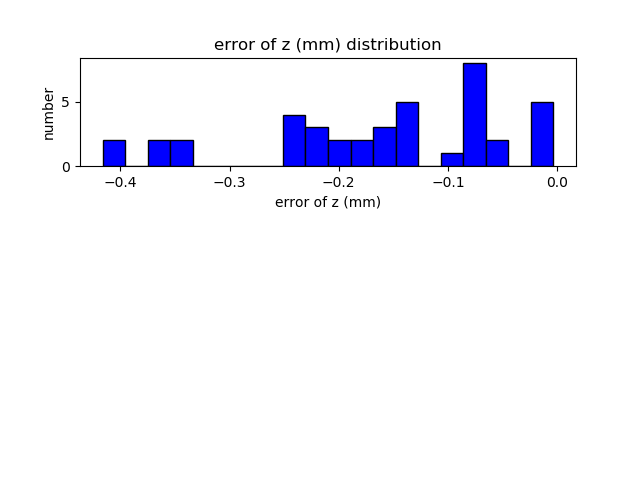

success ratio:  0.640625


<IPython.core.display.Javascript object>


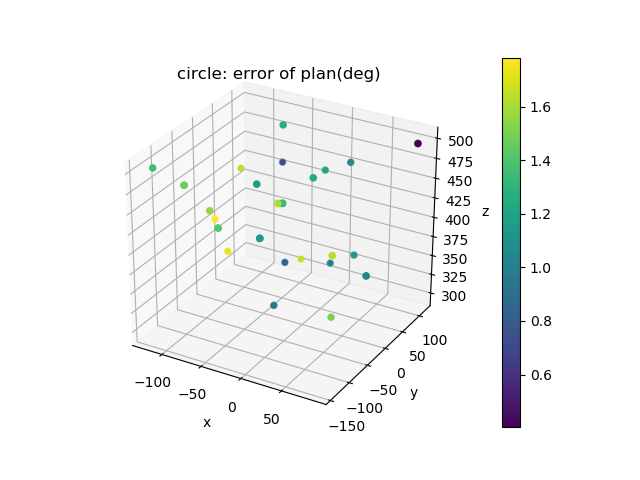

<IPython.core.display.Javascript object>


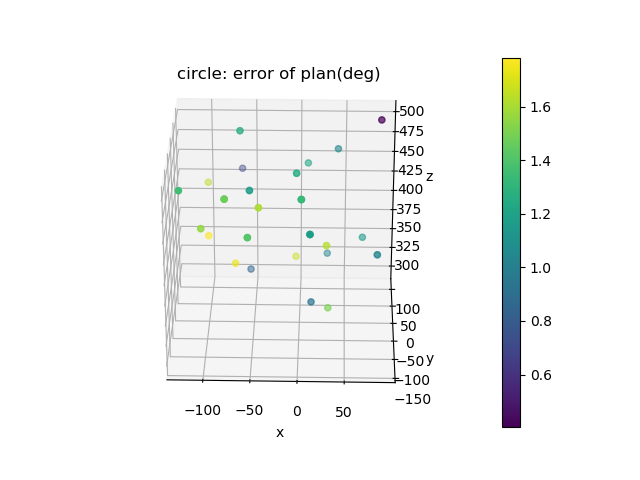

<IPython.core.display.Javascript object>


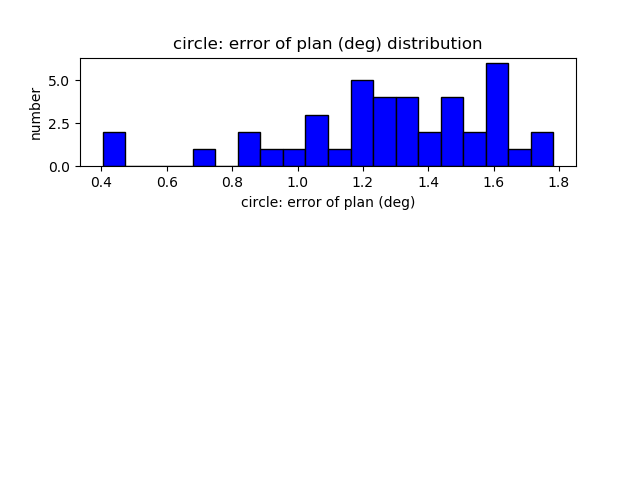

<IPython.core.display.Javascript object>


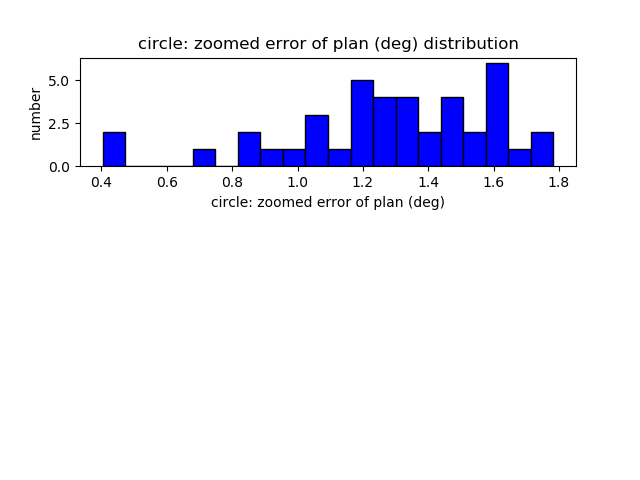

In [117]:
#df_hough = data_analysor.computeErrorInBase(data_analysor.df_hough)
mask_0 = (df_hough["center_in_cam_2"] < 500) & (df_hough["center_in_cam_0"] < 100)
new_df = df_hough[mask_0].reset_index(drop=True)
print(new_df)
visualize(new_df, "circle")

<IPython.core.display.Javascript object>


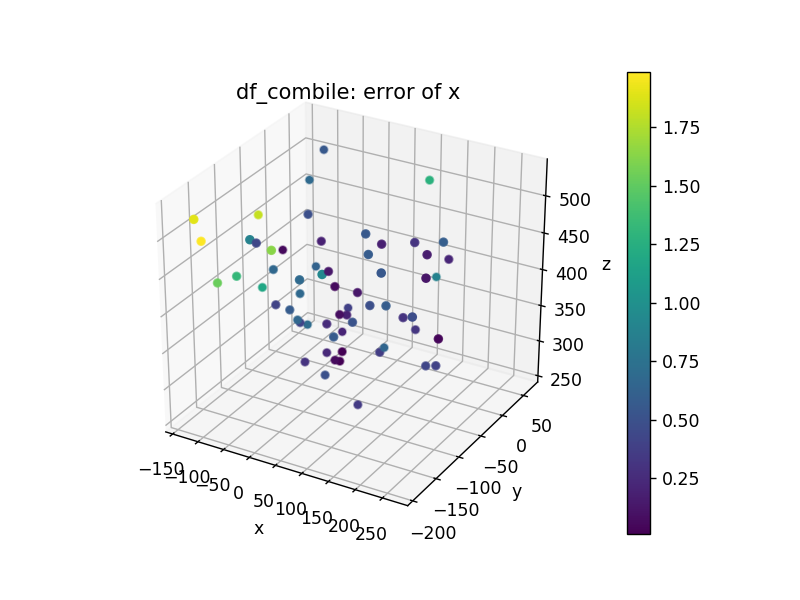

<IPython.core.display.Javascript object>


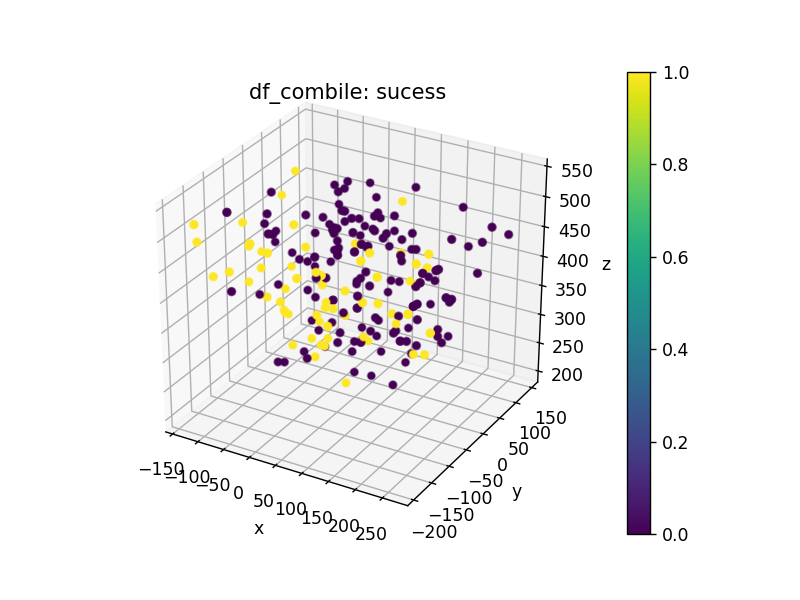

success ratio:  0.31


<IPython.core.display.Javascript object>


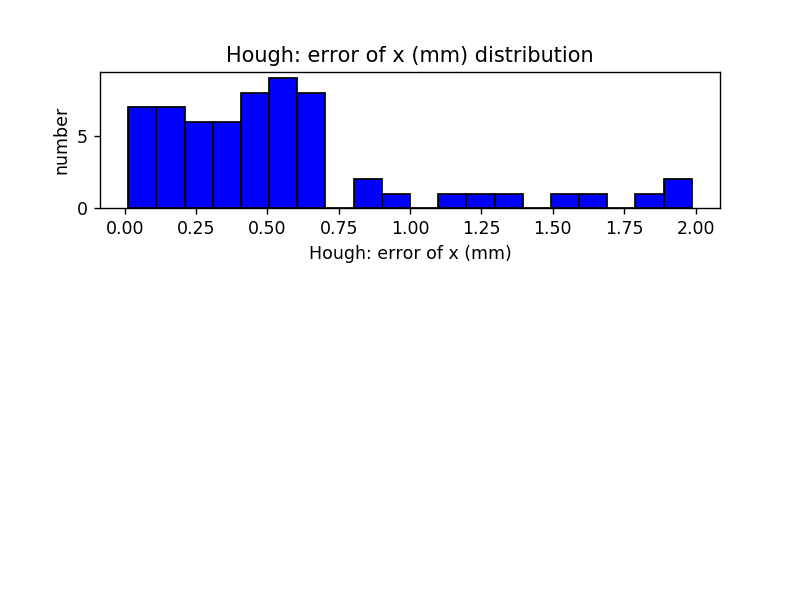

<IPython.core.display.Javascript object>


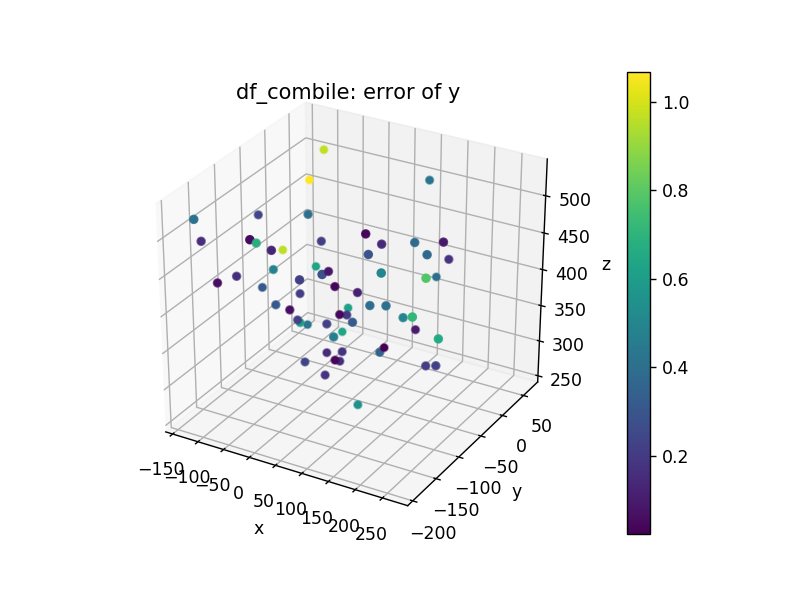

<IPython.core.display.Javascript object>


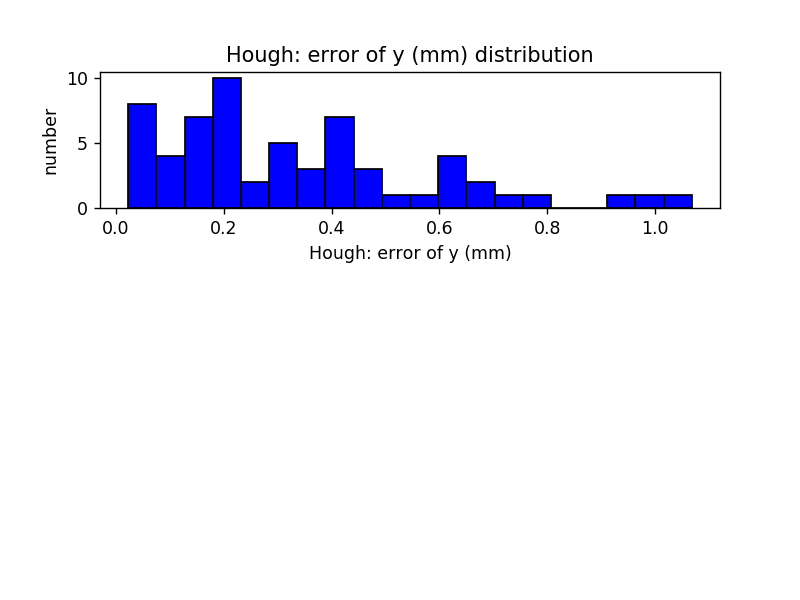

<IPython.core.display.Javascript object>


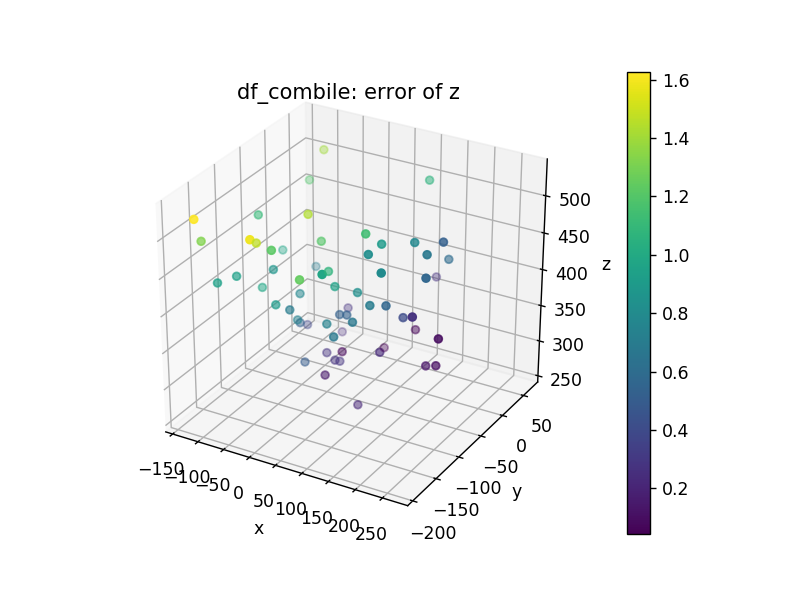

<IPython.core.display.Javascript object>


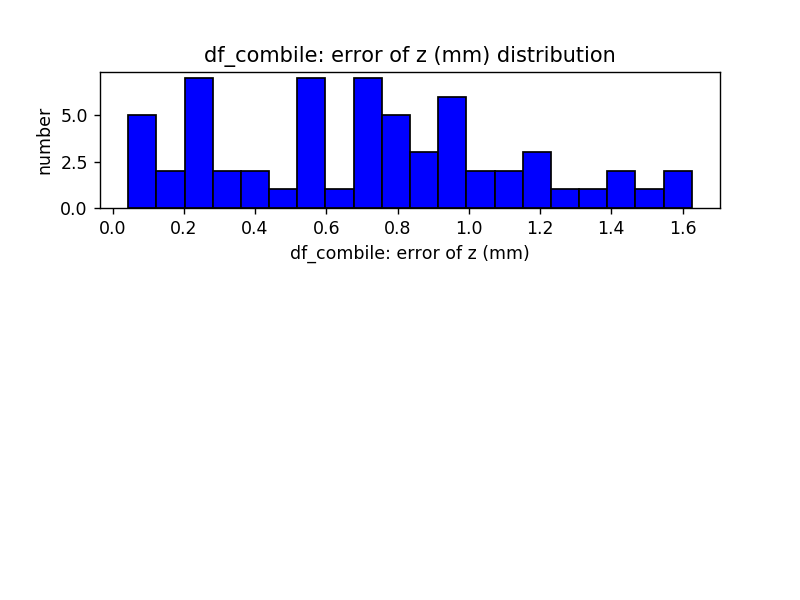

<IPython.core.display.Javascript object>


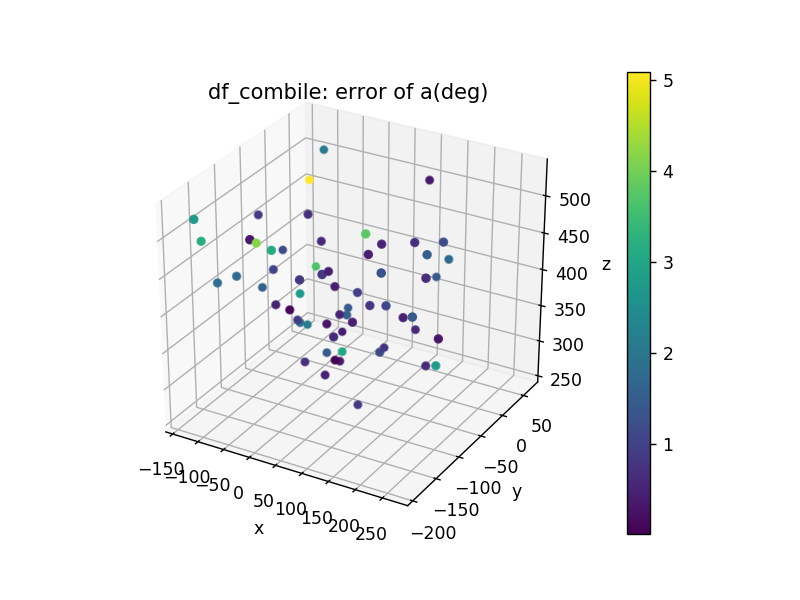

<IPython.core.display.Javascript object>


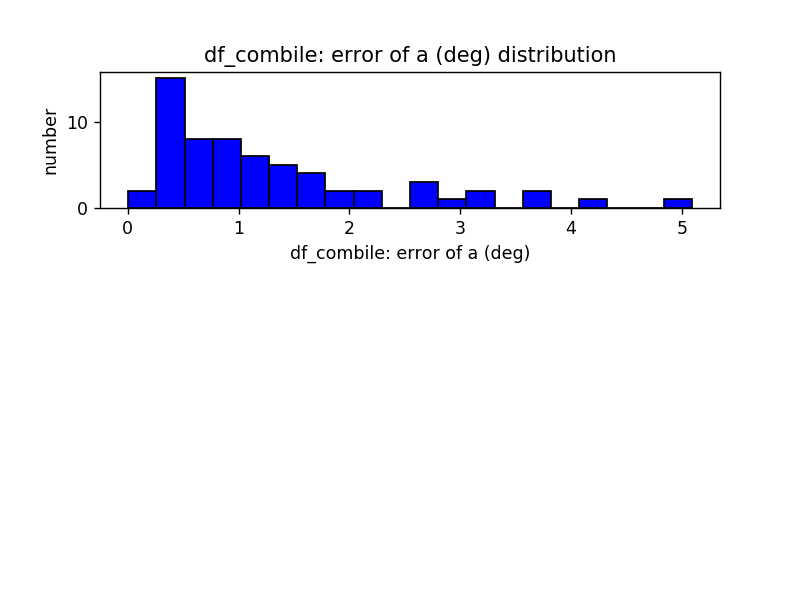

<IPython.core.display.Javascript object>


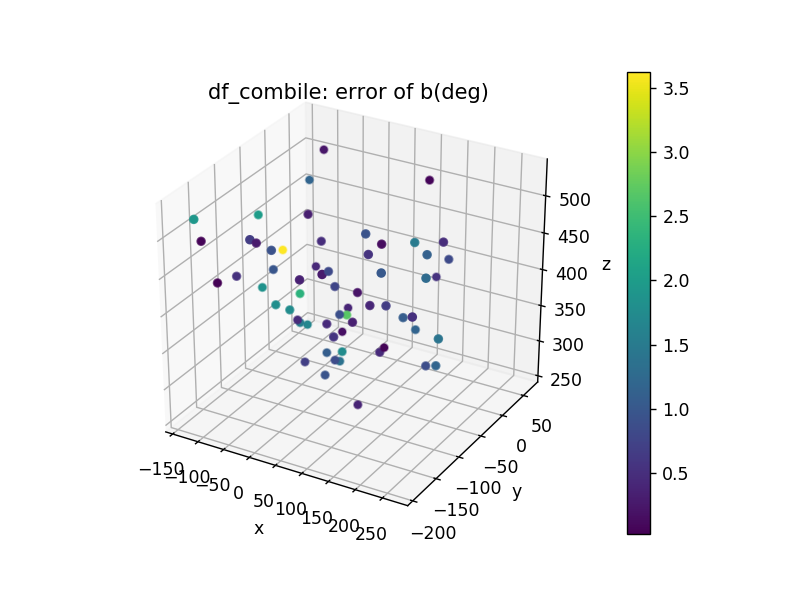

<IPython.core.display.Javascript object>


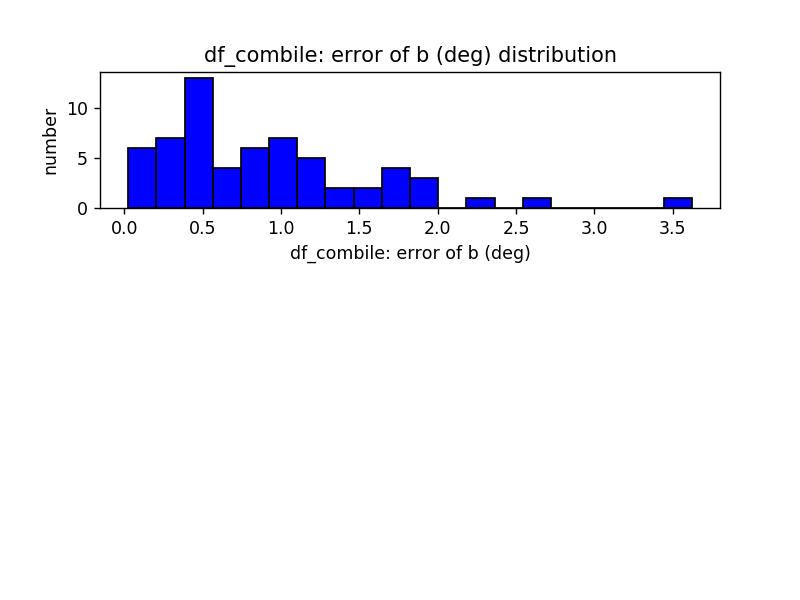

<IPython.core.display.Javascript object>


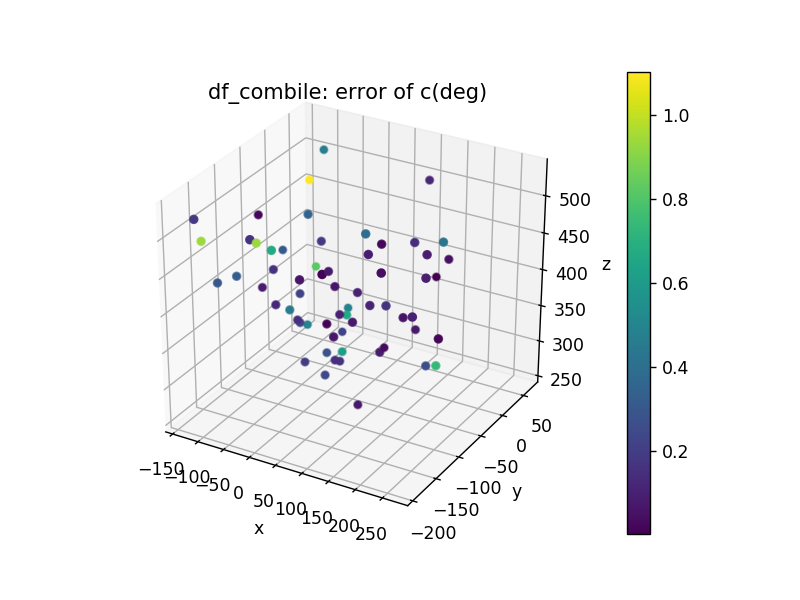

<IPython.core.display.Javascript object>


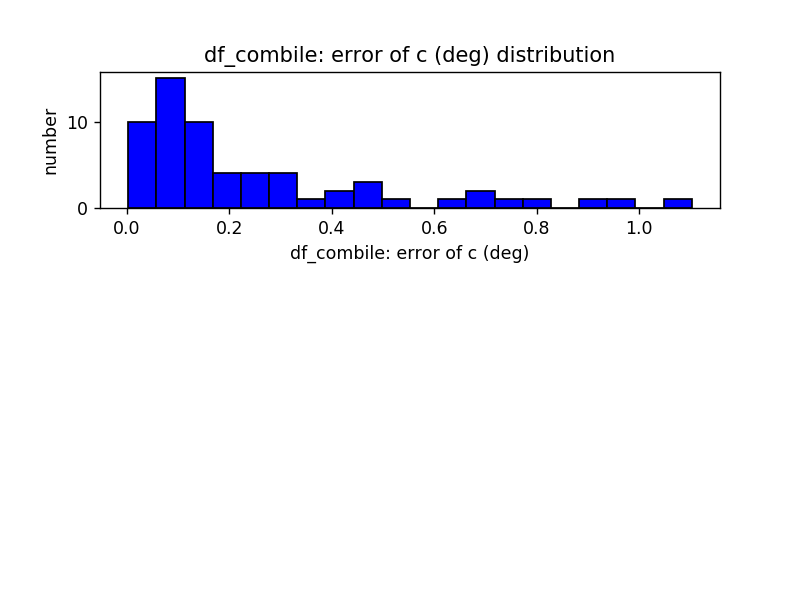

In [71]:

df_combile = data_analysor.computeErrorInBase(data_analysor.df_combile)
visualize(df_combile, "df_combile")


<IPython.core.display.Javascript object>


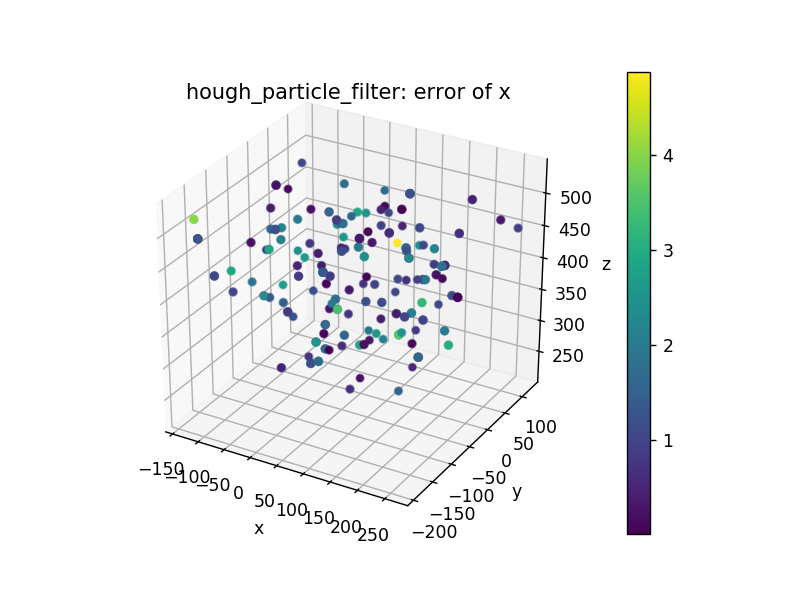

<IPython.core.display.Javascript object>


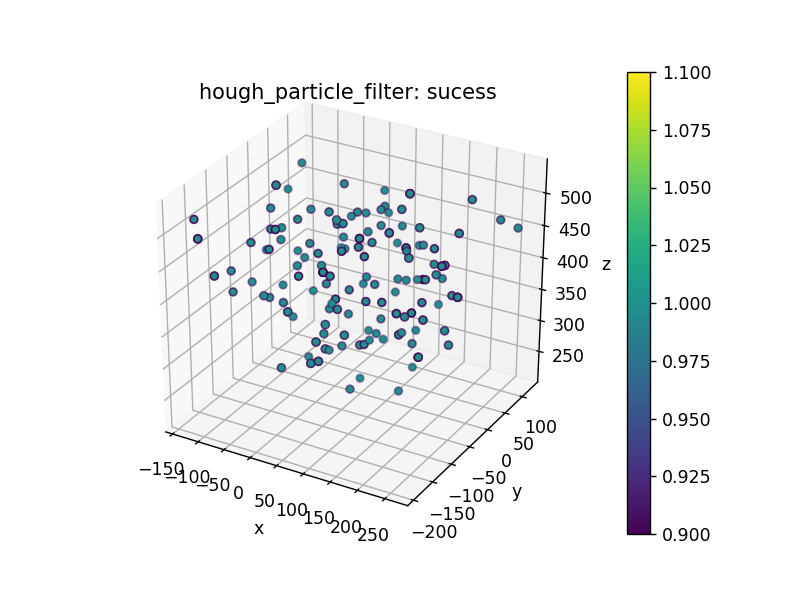

success ratio:  1.0


<IPython.core.display.Javascript object>


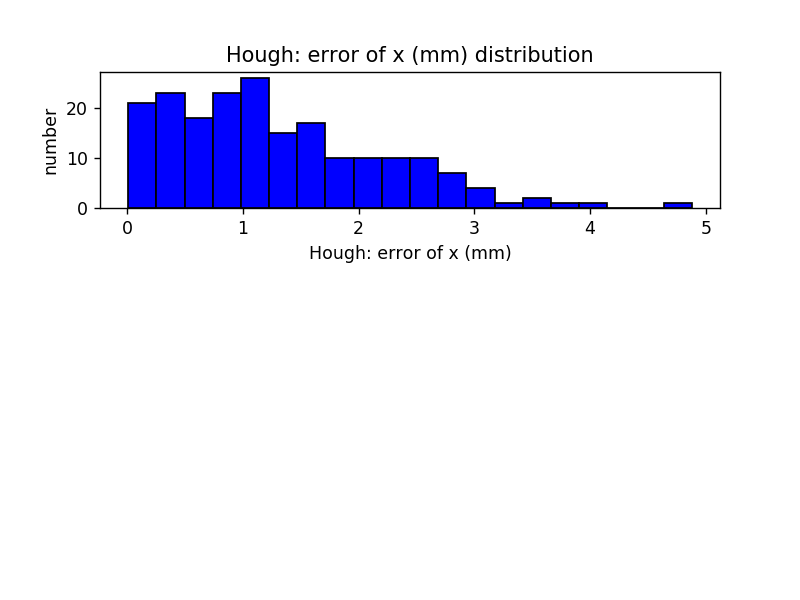

<IPython.core.display.Javascript object>


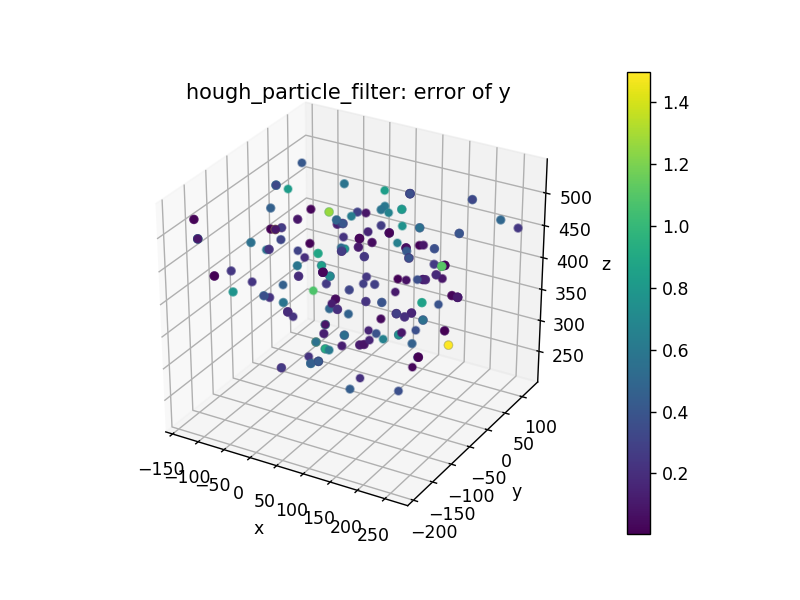

<IPython.core.display.Javascript object>


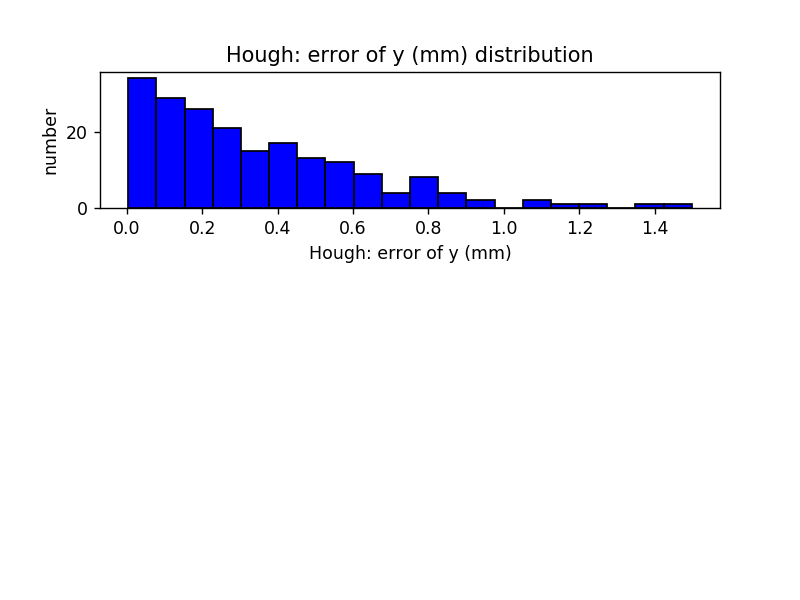

<IPython.core.display.Javascript object>


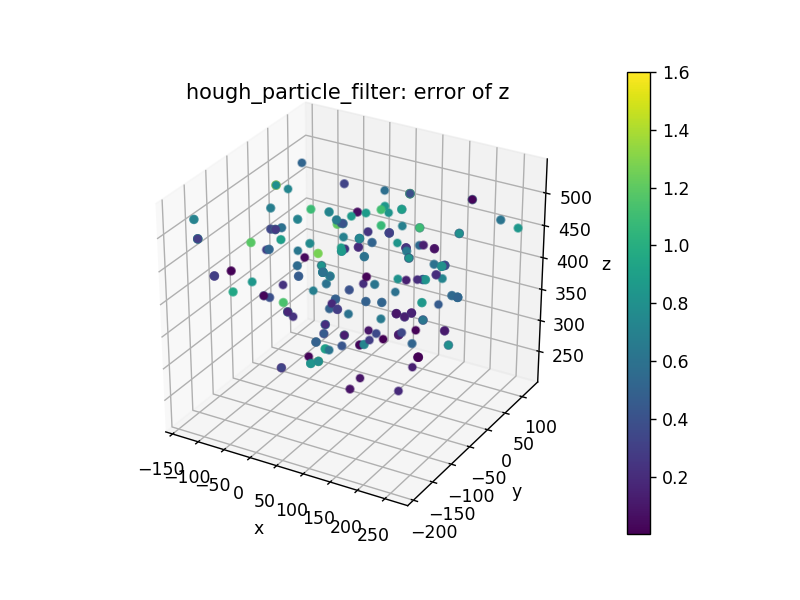

<IPython.core.display.Javascript object>


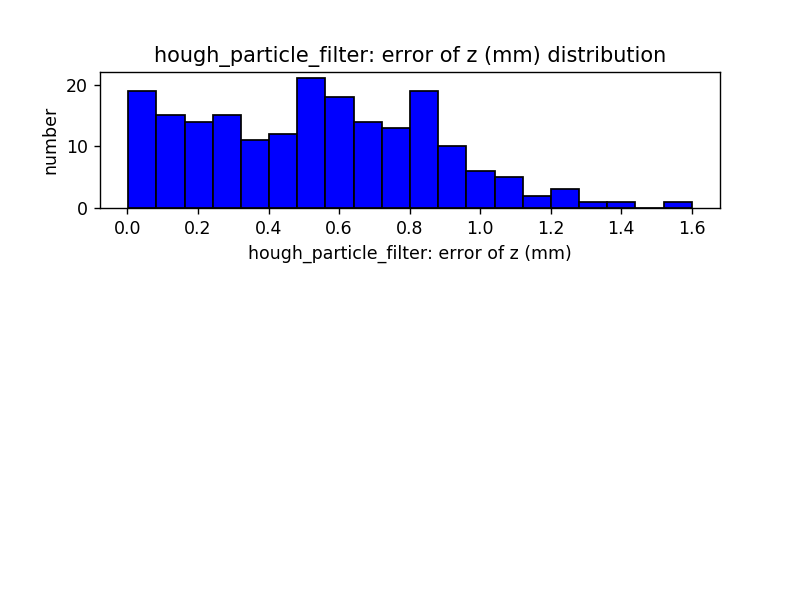

<IPython.core.display.Javascript object>


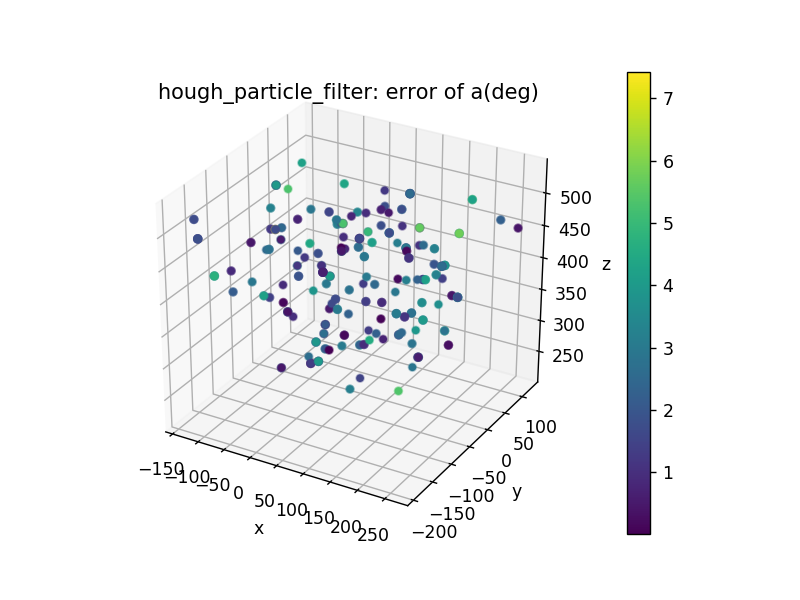

<IPython.core.display.Javascript object>


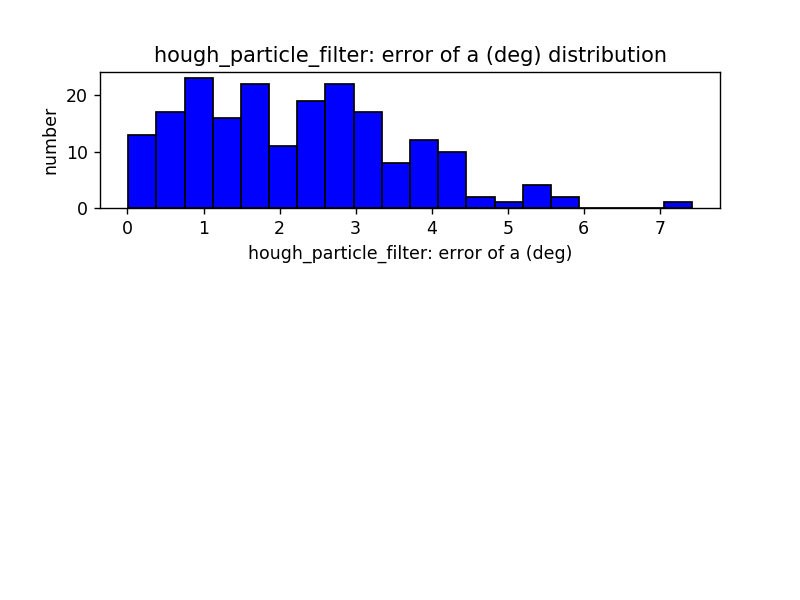

<IPython.core.display.Javascript object>


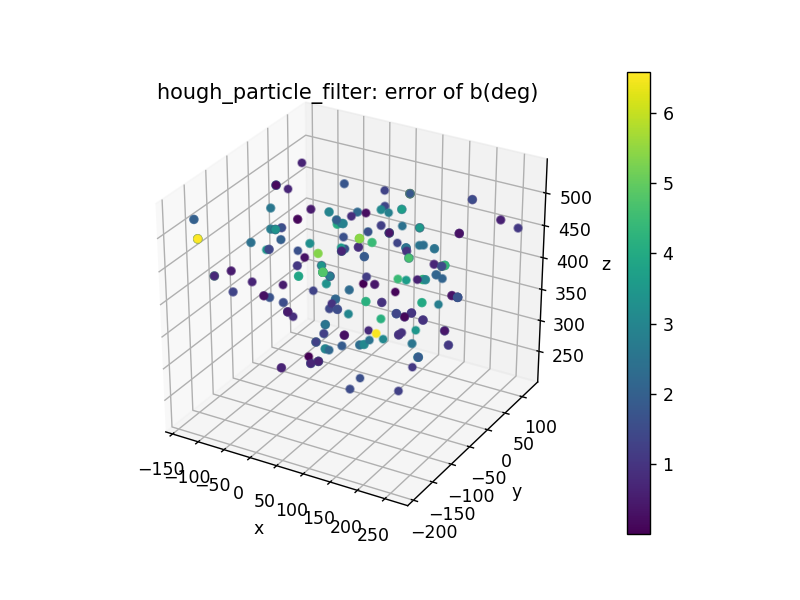

<IPython.core.display.Javascript object>


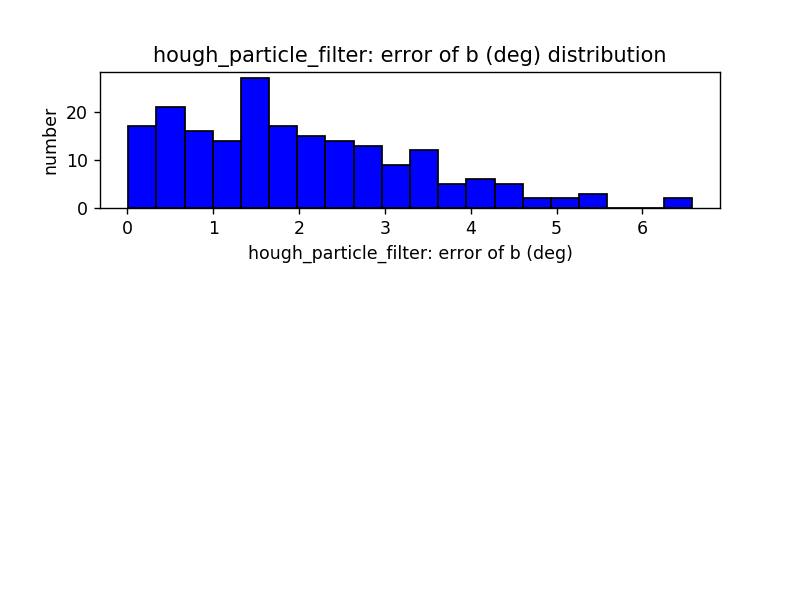

<IPython.core.display.Javascript object>


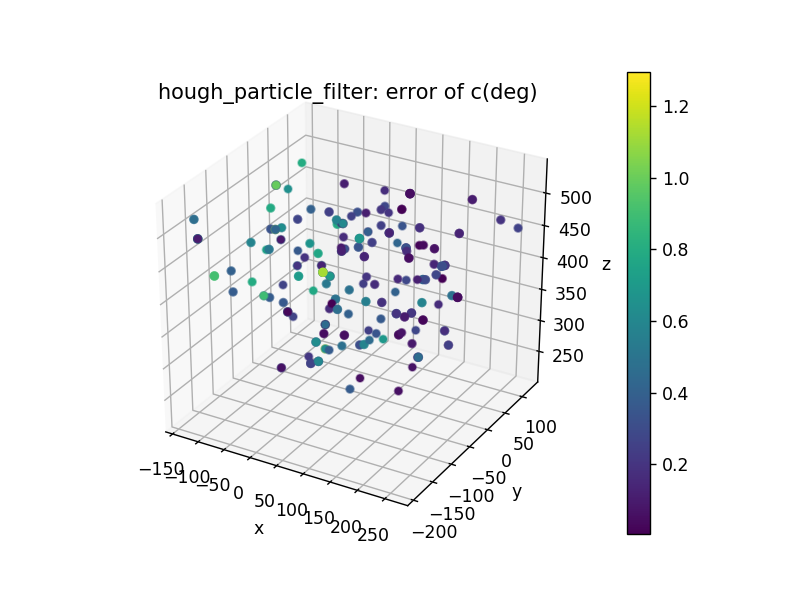

<IPython.core.display.Javascript object>


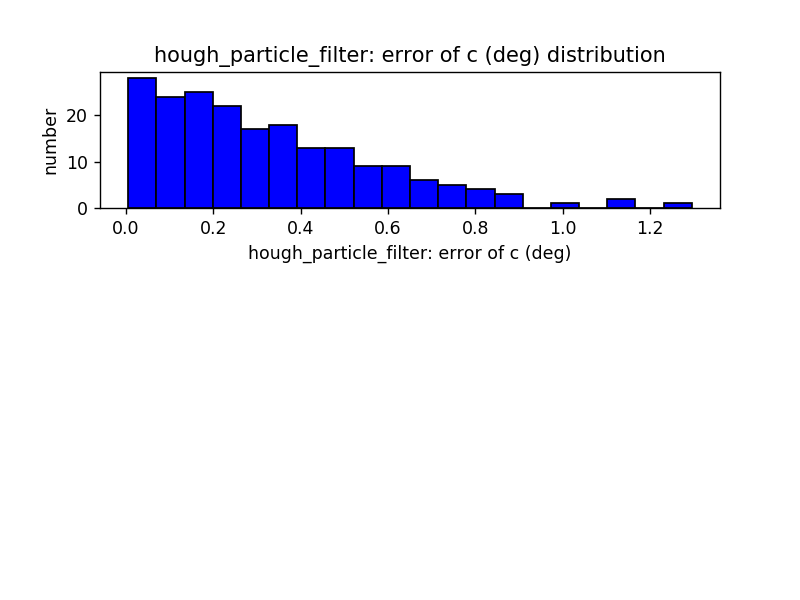

In [72]:

df_hough_particle_filter = data_analysor.computeErrorInBase(data_analysor.df_hough_particle_filter)
visualize(df_hough_particle_filter, "hough_particle_filter")